## Lista 7

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [17]:
def gen_xt(n, phi, sigma):
  X = np.zeros(n)
  X[0] = np.random.normal(0, sigma)
  for i in range(1, n):
    noise = np.random.normal(0, sigma)
    X[i] = phi * X[i - 1] + noise
  return np.array(X)
# x0 = 0
phi = 0.2
sigma = 1
n = 1000
X = gen_xt(n, phi, sigma)

In [3]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

## zadanie 1

In [30]:
def ar2(n,phi, sigma):
  X = np.zeros(n)
  X[0] = np.random.normal(0, sigma)
  X[1] = np.random.normal(0, sigma)
  for i in range(2, n):
    noise = np.random.normal(0, sigma)
    X[i] = phi[0] * X[i - 1] + phi[1] * X[i-2] + noise
  return X
# x0 = 0
phi = [0.2, 0.3]
sigma = 1
n = 1000
X = ar2(n, phi, sigma)

In [35]:
def phi1_hat(X, gamma):
    return (gamma(X, 0)*gamma(X, 1) - gamma(X, 1)*gamma(X,2)) / (gamma(X,0)**2 - gamma(X,1)**2)
def phi2_hat(X, gamma):
    return (gamma(X, 0)*gamma(X, 2) - gamma(X, 1)**2) / (gamma(X,0)**2 - gamma(X,1)**2)


In [36]:
phi_1 = []
phi_2 = []
for i in range(1000):
    X = ar2(n, phi, sigma)
    est = phi1_hat(X, sampleACVF)
    ast = phi2_hat(X, sampleACVF)
    phi_1.append(est)
    phi_2.append(ast)    

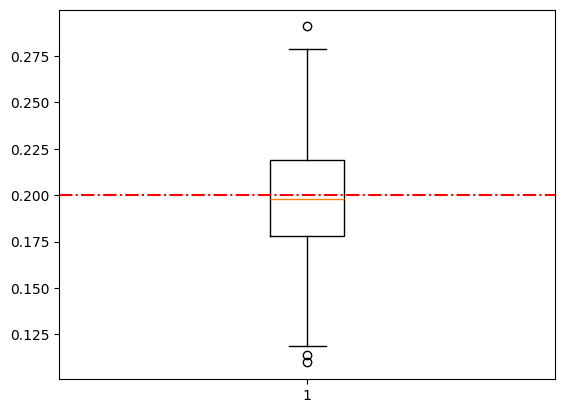

In [37]:
plt.boxplot(phi_1)
plt.axhline(phi[0], color = 'red', ls='-.')

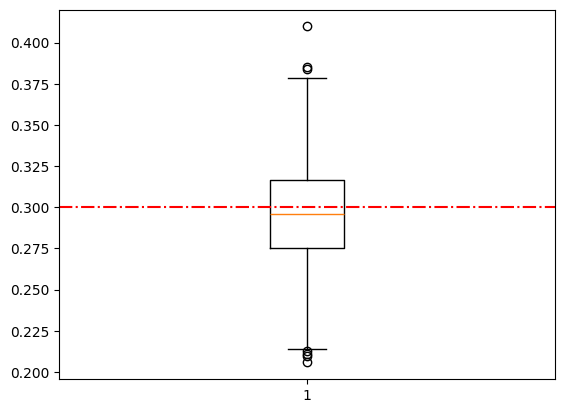

In [38]:
plt.boxplot(phi_2)
plt.axhline(phi[1], color = 'red', ls='-.')

## zadanie 2

Estymator parametru $\phi$ dla szeregu AR(1):
$$X_t + \phi X_{t-1} = Z_t, \quad Z_t \sim WN(0, 1)$$

    a) za pomocą metody NNW otrzymujemy następujący wzór:
$$\hat{\phi} =  \frac{\sum x_{i-1} \cdot x_i}{\sum (x_{i-1})^2}.$$

    b) za pomocą metody Yule-Walkera mamy:
$$\hat{\phi} =  \frac{\gamma(0) - 1}{\gamma(1)}.$$    

In [23]:
def phi_nnw(X):
    return (sum(X[1:]*X[:-1]))/sum((X[:-1])**2)

def phi_yw(X, gamma):
    return (gamma(X, 0) - 1) / gamma(X, 1)

In [33]:
nnw = []
yw = []
pho = 0.2
for i in range(1000):
    X = gen_xt(n, pho, sigma)
    est1 = phi_yw(X, sampleACVF)
    est2 = phi_nnw(X)
    yw.append(est1)  
    nnw.append(est2)

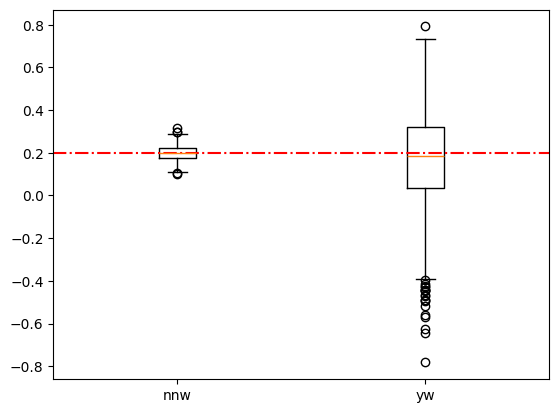

In [34]:
plt.boxplot([nnw, yw], labels = ['nnw', 'yw'])
plt.axhline(pho, color = 'red', ls='-.')

## zadanie 3